In [139]:
# import glob
# import pandas as pd
# import json

# projects = ["djanjo", "flask", "pytorch", "pandas"]
# dfs=[]

# for project in projects:
#     filenames = glob.glob(f"../output/pytlint/{project}/*.json")
#     for filename in filenames:
#         with open(filename) as json_data:
#             data = json.load(json_data)
#             df = pd.json_normalize(data)
#             df['project'] = project
#             dfs.append(df)




In [140]:
# df_py = pd.concat(dfs, ignore_index=True)

# df_py.head(5)

In [141]:
# df_py.groupby(['project','message-id'])['message-id'].count()

In [142]:
# import psycopg2

# conn = psycopg2.connect("host={} user={} dbname=exception_miner password={} port={}".format("127.0.0.1", "exception_miner", "exception_miner", "5432"))
# conn.set_session(autocommit=True)
# cur = conn.cursor()

# cur.execute("""CREATE TABLE IF NOT EXISTS exceptions_pylint (type VARCHAR(255), module VARCHAR(255), obj VARCHAR(255), beginLine INT, beginColumn INT,	endLine INT, endColumn INT, path VARCHAR(255), symbol VARCHAR(255), message VARCHAR(255), message_id VARCHAR(255), project VARCHAR(255))""")

# cur.execute("""DELETE FROM exceptions_pylint;""")

# for i, row in df_py.iterrows():
#     #print(row)
#     cur.execute(("""INSERT INTO exceptions_pylint (type, module, obj, beginLine, beginColumn, endLine, endColumn, path, symbol, message, message_id, project)
#                             VALUES (%s, %s, %s, %s, %s, %s,%s, %s, %s, %s, %s, %s  );"""), list(row))

Python Parser

In [143]:
import glob
import pandas as pd
import json

# projects = ["django", "flask", "pytorch", "pandas"]
projects = ["flask"]
dfs=[]

for project in projects:
    #filenames = glob.glob(f"../output/parser/*.csv")
    #print(filename)
    df = pd.read_csv(f"../output/parser/{project}_stats.csv")
    df['project'] = project
    dfs.append(df)


In [144]:
df = pd.concat(dfs, ignore_index=True)
df.head(5)

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,n_captures_misplaced_bare_raise,n_try_else,n_try_return,str_except_identifiers,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,project
0,/home/r4ph/desenv/exception-miner/projects/py/...,test_add,"def test_add(client, a, b, result):\n respo...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask
1,/home/r4ph/desenv/exception-miner/projects/py/...,check,"def check(sender, template, context):\n ...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask
2,/home/r4ph/desenv/exception-miner/projects/py/...,test_index,"def test_index(app, client, path, template_nam...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask
3,/home/r4ph/desenv/exception-miner/projects/py/...,client,def client(app):\n return app.test_client(),NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask
4,/home/r4ph/desenv/exception-miner/projects/py/...,fixture_app,def fixture_app():\n app.testing = True\n ...,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask


In [145]:
df[df['str_uncaught_exceptions'].isnull() == False].shape

(5, 21)

In [146]:
df[df['n_bare_except'] > 0]

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,n_captures_misplaced_bare_raise,n_try_else,n_try_return,str_except_identifiers,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,project


In [147]:
df.shape

(1412, 21)

In [148]:
#TODO:
#Analisar Duplicados
df[df.duplicated()]

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,n_captures_misplaced_bare_raise,n_try_else,n_try_return,str_except_identifiers,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,project
157,/home/r4ph/desenv/exception-miner/projects/py/...,hello_command,"def hello_command():\n click.echo(""Hell...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask
162,/home/r4ph/desenv/exception-miner/projects/py/...,view,def view(company_id):\n return company_id,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask
187,/home/r4ph/desenv/exception-miner/projects/py/...,index,def index():\n return flask.request.url,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask
193,/home/r4ph/desenv/exception-miner/projects/py/...,index,def index():\n flask.g.user_agent = fla...,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask
195,/home/r4ph/desenv/exception-miner/projects/py/...,index,def index():\n return flask.request.url,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,/home/r4ph/desenv/exception-miner/projects/py/...,index,"def index():\n return f""Hello {flask.re...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask
1015,/home/r4ph/desenv/exception-miner/projects/py/...,end_of_request,def end_of_request(exception):\n buffer...,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask
1017,/home/r4ph/desenv/exception-miner/projects/py/...,end_of_request,def end_of_request(exception):\n buffer...,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask
1088,/home/r4ph/desenv/exception-miner/projects/py/...,to_json,"def to_json(self, value: t.Any) -> t.Any:\n ...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,flask


Analyzing the Control Flow and Code

In [149]:
import glob
import pandas as pd
import json

projects = ["django", "flask", "pytorch", "pandas"]
dfs=[]
filenames = glob.glob(f"../output/parser/*.csv")

for filename in filenames:
    #filenames = glob.glob(f"../output/parser/*.csv")
    #print(filename)
    df = pd.read_csv(filename)
    project = filename.split("/")[-1].split("_")[0]
    df['project'] = project
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [150]:
df.shape

(1295543, 21)

In [151]:
df.drop_duplicates()

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,n_captures_misplaced_bare_raise,n_try_else,n_try_return,str_except_identifiers,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,project
0,/home/r4ph/desenv/phd/exception-miner/projects...,predict_seq2seq,"def predict_seq2seq(net, src_sentence, src_voc...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,d2l-en
1,/home/r4ph/desenv/phd/exception-miner/projects...,train_seq2seq,"def train_seq2seq(net, data_iter, lr, num_epoc...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,d2l-en
2,/home/r4ph/desenv/phd/exception-miner/projects...,forward,"def forward(self, pred, label, valid_len):\n ...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,d2l-en
3,/home/r4ph/desenv/phd/exception-miner/projects...,load_data_nmt,"def load_data_nmt(batch_size, num_steps, num_e...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,d2l-en
4,/home/r4ph/desenv/phd/exception-miner/projects...,build_array_nmt,"def build_array_nmt(lines, vocab, num_steps):\...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,d2l-en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295538,/home/r4ph/desenv/exception-miner/projects/py/...,wttr,"def wttr(location=None):\n ""Main function w...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,wttr.in
1295539,/home/r4ph/desenv/exception-miner/projects/py/...,send_malformed,"def send_malformed():\n ""Send static file m...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,wttr.in
1295540,/home/r4ph/desenv/exception-miner/projects/py/...,send_favicon,"def send_favicon():\n ""Send static file fav...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,wttr.in
1295541,/home/r4ph/desenv/exception-miner/projects/py/...,send_static,"def send_static(path):\n ""Send any static f...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,wttr.in


In [152]:
df.project.unique()

array(['d2l-en', 'q', 'qlib', 'vid2vid', 'urh', 'machine', 'altair',
       'stablediffusion', 'scikit-learn', 'pillow', 'graphene',
       'algorithms', 'lbry-sdk', 'thefuck', 'xsstrike', 'ray',
       'centernet', 'bup', 'awesome-quant', 'bert', 'wait-for-it',
       'chinese-dos-games', 'falcon', 'certbot', 'docopt',
       '30-days-of-python', 'musicbox', 'dirsearch', 'spleeter',
       'python-fire', 'mlcourse.ai', 'baselines', 'prefect', 'pyecharts',
       'trumpscript', 'macos-security-and-privacy-guide', 'wtv', 'depix',
       'pytorch3d', 'alphapose', 'mycli', 'wagtail', 'tushare',
       'spaceshipgenerator', 'walle-web', 'mmdetection', 'pix2code',
       'sherlock', 'hanlp', 'dalle2-pytorch', 'ciphey', 'deepfacelive',
       'calibre', 'cookiecutter-django', 'gixy', 'dain', 'tensorboardx',
       'openage', 'starlette', 'full-stack-fastapi-postgresql',
       'awesome-aws', 'yapf', 'django-allauth', 'awesome-python',
       'meshroom', 'gitsome', 'anti-anti-spider', 'imagea

In [153]:
len(df.project.unique())

495

In [154]:
df.shape

(1295543, 21)

In [155]:
df.head(5)

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,n_captures_misplaced_bare_raise,n_try_else,n_try_return,str_except_identifiers,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,project
0,/home/r4ph/desenv/phd/exception-miner/projects...,predict_seq2seq,"def predict_seq2seq(net, src_sentence, src_voc...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,d2l-en
1,/home/r4ph/desenv/phd/exception-miner/projects...,train_seq2seq,"def train_seq2seq(net, data_iter, lr, num_epoc...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,d2l-en
2,/home/r4ph/desenv/phd/exception-miner/projects...,forward,"def forward(self, pred, label, valid_len):\n ...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,d2l-en
3,/home/r4ph/desenv/phd/exception-miner/projects...,load_data_nmt,"def load_data_nmt(batch_size, num_steps, num_e...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,d2l-en
4,/home/r4ph/desenv/phd/exception-miner/projects...,build_array_nmt,"def build_array_nmt(lines, vocab, num_steps):\...",NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,0,0,0,d2l-en


In [156]:
df[df['str_except_identifiers'].notna()].head(10)

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,n_captures_misplaced_bare_raise,n_try_else,n_try_return,str_except_identifiers,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,project
976,/home/r4ph/desenv/phd/exception-miner/projects...,parse_options,"def parse_options(args, options):\n if opti...",NaN,5,0,0,1,0,0,...,0,0,0,Exception LookupError,NaN,"print(""Could not read query from file %s"" % op...",0,3,0,q
979,/home/r4ph/desenv/phd/exception-miner/projects...,initialize_command_line_parser,"def initialize_command_line_parser(p, qrc_file...",...bin.q.get_option_with_default:Exception,1,0,0,0,0,0,...,0,0,0,IncorrectDefaultValueException,NaN,"print(""Incorrect value '%s' for option %s in ....",0,0,0,q
985,/home/r4ph/desenv/phd/exception-miner/projects...,get_option_with_default,"def get_option_with_default(p, option_type, op...",NaN,1,0,0,0,2,1,...,0,0,0,ValueError,Exception IncorrectDefaultValueException,raise IncorrectDefaultValueException(option_ty...,0,0,0,q
986,/home/r4ph/desenv/phd/exception-miner/projects...,_print_output,"def _print_output(self,f_out,f_err,results):\n...",NaN,5,3,0,0,1,0,...,0,0,0,UnicodeEncodeError UnicodeError TypeError IOEr...,NaN,"print(""Cannot encode data. Error:%s"" % e, file...",0,0,0,q
987,/home/r4ph/desenv/phd/exception-miner/projects...,print_output,"def print_output(self,f_out,f_err,results):\n ...",NaN,3,2,0,0,1,0,...,0,0,0,UnicodeEncodeError UnicodeError IOError Keyboa...,NaN,"print(""Cannot encode data. Error:%s"" % e, file...",0,0,0,q
1002,/home/r4ph/desenv/phd/exception-miner/projects...,_execute,"def _execute(self,query_str,input_params=None,...",NaN,27,0,0,1,0,0,...,0,0,1,InvalidQueryException MissingHeaderException F...,NaN,"error = QError(EncodedQueryException(''),""Quer...",0,1,0,q
1007,/home/r4ph/desenv/phd/exception-miner/projects...,detach_from_db,"def detach_from_db(self, target_db, source_db)...",NaN,1,0,0,1,1,0,...,0,0,0,Exception,NaN,raise,0,0,0,q
1008,/home/r4ph/desenv/phd/exception-miner/projects...,attach_to_db,"def attach_to_db(self, target_db, source_db):\...",NaN,2,0,0,1,2,0,...,0,0,0,SqliteOperationalErrorException Exception,TooManyAttachedDatabasesException,if 'too many attached databases' in str(e):\n ...,0,0,0,q
1052,/home/r4ph/desenv/phd/exception-miner/projects...,_populate,"def _populate(self,dialect,stop_after_analysis...",NaN,2,0,1,0,3,0,...,0,0,0,StrictModeColumnCountMismatchException FluffyM...,MissingHeaderException ColumnCountMismatchExce...,raise ColumnCountMismatchException(\n ...,0,0,0,q
1114,/home/r4ph/desenv/phd/exception-miner/projects...,generate_rows,def generate_rows(self):\n csv_reader =...,...bin.q.py3_encoded_csv_reader:CouldNotParseI...,2,0,0,0,2,0,...,0,0,0,ColumnMaxLengthLimitExceededException Universa...,ColumnMaxLengthLimitExceededException Universa...,"msg = ""Column length is larger than the maximu...",0,0,0,q


In [157]:
df.iloc[428,:].func_body

'def multibox_target(anchors, labels):\n    """Label anchor boxes using ground-truth bounding boxes.\n\n    Defined in :numref:`subsec_labeling-anchor-boxes`"""\n    batch_size, anchors = labels.shape[0], anchors.squeeze(0)\n    batch_offset, batch_mask, batch_class_labels = [], [], []\n    device, num_anchors = anchors.device, anchors.shape[0]\n    for i in range(batch_size):\n        label = labels[i, :, :]\n        anchors_bbox_map = assign_anchor_to_bbox(\n            label[:, 1:], anchors, device)\n        bbox_mask = ((anchors_bbox_map >= 0).float().unsqueeze(-1)).repeat(\n            1, 4)\n        # Initialize class labels and assigned bounding box coordinates with\n        # zeros\n        class_labels = torch.zeros(num_anchors, dtype=torch.long,\n                                   device=device)\n        assigned_bb = torch.zeros((num_anchors, 4), dtype=torch.float32,\n                                  device=device)\n        # Label classes of anchor boxes using their assign

In [158]:
df.iloc[428,:].str_except_identifiers

nan

In [159]:
df[df['n_bare_raise_finally'] >= 1]#.count()

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,n_captures_misplaced_bare_raise,n_try_else,n_try_return,str_except_identifiers,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,project
130415,/home/r4ph/desenv/phd/exception-miner/projects...,run_optimizer,"def run_optimizer(file_path, cmd, as_filter=Fa...",NaN,3,0,2,0,2,0,...,0,0,0,OSError OSError OSError,NaN,sz = 0 if err.errno != errno.ENOENT:\n ...,1,0,2,calibre
223392,/home/r4ph/desenv/phd/exception-miner/projects...,_get_analysis,"def _get_analysis(self, item):\n mbid =...",...beetsplug.absubmit.call:ABSubmitError,2,0,1,0,1,0,...,0,0,1,ABSubmitError OSError,NaN,"self._log.warning(\n ""Faile...",1,0,1,beets
356309,/home/r4ph/desenv/exception-miner/projects/py/...,run_tests,"def run_tests(self, test_labels, **kwargs):\n ...",NaN,2,0,1,2,2,0,...,0,0,0,Exception Exception,NaN,run_failed = True\n raise if not ru...,0,0,1,django
816577,/home/r4ph/desenv/exception-miner/projects/py/...,bind_unix_socket,"def bind_unix_socket(path: str, *, mode=0o666,...",NaN,3,1,2,0,4,0,...,0,0,0,FileNotFoundError,FileNotFoundError FileExistsError,pass try:\n os.unlink(tmp_path)...,1,0,2,sanic
1139547,/home/r4ph/desenv/phd/exception-miner/projects...,_get_results,"async def _get_results(\n self,\n ...",NaN,3,0,2,1,5,0,...,0,0,0,Exception asyncio CancelledError,RuntimeError ex ConnectionError exception_raised,exception_raised = ex\n try:\n ...,1,1,1,jina
1217787,/home/r4ph/desenv/phd/exception-miner/projects...,run_till_snapshot_point,def run_till_snapshot_point(\n program: str...,NaN,1,0,1,0,1,0,...,0,0,0,subprocess TimeoutExpired,NaN,"print(""[parent] Killing child, after timeout.""...",0,0,1,memray
1241206,/home/r4ph/desenv/exception-miner/projects/py/...,trace_task,"def trace_task(\n uuid: str,\n ...",NaN,12,1,2,3,5,0,...,0,3,0,AttributeError BackendGetMetaError Reject Igno...,InvalidTaskError,raise InvalidTaskError(\n '...,2,0,1,celery
1241208,/home/r4ph/desenv/exception-miner/projects/py/...,build_tracer,"def build_tracer(\n name: str,\n ...",NaN,12,1,2,3,6,0,...,1,3,0,AttributeError BackendGetMetaError Reject Igno...,InvalidTaskError,raise InvalidTaskError(\n '...,2,0,1,celery
1256551,/home/r4ph/desenv/phd/exception-miner/projects...,__aenter__,"async def __aenter__(self):\n status_r,...",NaN,1,0,2,1,3,0,...,0,0,0,Exception asyncio CancelledError,RuntimeError,try:\n await self._shutdown()\n...,0,0,1,edgedb
1256675,/home/r4ph/desenv/phd/exception-miner/projects...,write_data_cache,"def write_data_cache(\n obj: Any,\n cach...",NaN,2,2,1,1,1,0,...,0,1,0,Exception OSError OSError,NaN,try:\n os.unlink(f.name)\n e...,0,0,1,edgedb


In [160]:
df.iloc[500, :].func_body

"def _build_array(sentences, vocab, is_tgt=False):\n            pad_or_trim = lambda seq, t: (\n                seq[:t] if len(seq) > t else seq + ['<pad>'] * (t - len(seq)))\n            sentences = [pad_or_trim(s, self.num_steps) for s in sentences]\n            if is_tgt:\n                sentences = [['<bos>'] + s for s in sentences]\n            if vocab is None:\n                vocab = d2l.Vocab(sentences, min_freq=2)\n            array = d2l.tensor([vocab[s] for s in sentences])\n            valid_len = d2l.reduce_sum(\n                d2l.astype(array != vocab['<pad>'], d2l.int32), 1)\n            return array, vocab, valid_len"

In [161]:
df[df['n_try_except'] >1]

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,n_captures_misplaced_bare_raise,n_try_else,n_try_return,str_except_identifiers,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,project
976,/home/r4ph/desenv/phd/exception-miner/projects...,parse_options,"def parse_options(args, options):\n if opti...",NaN,5,0,0,1,0,0,...,0,0,0,Exception LookupError,NaN,"print(""Could not read query from file %s"" % op...",0,3,0,q
986,/home/r4ph/desenv/phd/exception-miner/projects...,_print_output,"def _print_output(self,f_out,f_err,results):\n...",NaN,5,3,0,0,1,0,...,0,0,0,UnicodeEncodeError UnicodeError TypeError IOEr...,NaN,"print(""Cannot encode data. Error:%s"" % e, file...",0,0,0,q
987,/home/r4ph/desenv/phd/exception-miner/projects...,print_output,"def print_output(self,f_out,f_err,results):\n ...",NaN,3,2,0,0,1,0,...,0,0,0,UnicodeEncodeError UnicodeError IOError Keyboa...,NaN,"print(""Cannot encode data. Error:%s"" % e, file...",0,0,0,q
1002,/home/r4ph/desenv/phd/exception-miner/projects...,_execute,"def _execute(self,query_str,input_params=None,...",NaN,27,0,0,1,0,0,...,0,0,1,InvalidQueryException MissingHeaderException F...,NaN,"error = QError(EncodedQueryException(''),""Quer...",0,1,0,q
1008,/home/r4ph/desenv/phd/exception-miner/projects...,attach_to_db,"def attach_to_db(self, target_db, source_db):\...",NaN,2,0,0,1,2,0,...,0,0,0,SqliteOperationalErrorException Exception,TooManyAttachedDatabasesException,if 'too many attached databases' in str(e):\n ...,0,0,0,q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295486,/home/r4ph/desenv/exception-miner/projects/py/...,_is_ip,"def _is_ip(ip_addr):\n """"""\n Check if `i...",NaN,2,0,0,0,0,0,...,0,0,2,socket error socket error socket error,NaN,try:\n socket.inet_pton(socket.AF_I...,0,0,0,wttr.in
1295504,/home/r4ph/desenv/exception-miner/projects/py/...,wttr,"def wttr(location, request):\n """"""Main rend...",NaN,2,0,0,1,0,0,...,0,0,0,RuntimeError Exception,NaN,"return (str(exception), 429) logging.error(""Ex...",0,0,0,wttr.in
1295513,/home/r4ph/desenv/exception-miner/projects/py/...,_parse_language_header,"def _parse_language_header(header):\n """"""\n...",NaN,2,1,0,0,0,0,...,0,0,1,IndexError ValueError ValueError,NaN,pass return None,0,0,0,wttr.in
1295524,/home/r4ph/desenv/exception-miner/projects/py/...,_fetch_content_and_headers,"def _fetch_content_and_headers(path, query_str...",NaN,3,0,0,0,0,0,...,0,0,0,requests ReadTimeout ValueError IndexError Val...,NaN,attempts -= 1\n continue error ...,0,0,0,wttr.in


In [162]:
df.str_except_block

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1295538    NaN
1295539    NaN
1295540    NaN
1295541    NaN
1295542    NaN
Name: str_except_block, Length: 1295543, dtype: object

In [163]:
df.str_except_block.str.split(" ").explode().value_counts().reset_index().head(50)
#df_except_types = df.str_except_identifiers.str.split(" ").explode().value_counts().reset_index()
#df_raise_types = df_raise_types[1:]
#df_raise_types.head(20)

,index,str_except_block
0,,1678904
1,=,27247
2,raise,20230
3,return,17024
4,pass,12354
5,if,11251
6,to,10952
7,not,8285
8,in,6523
9,the,6420


In [164]:
df.str_except_identifiers.unique()

array([nan, 'Exception LookupError', 'IncorrectDefaultValueException',
       ..., 'requests exceptions ConnectionError ValueError',
       'requests ReadTimeout ValueError IndexError ValueError',
       'ValueError TypeError IndexError ValueError'], dtype=object)

RQ1. How common and what are the main characteristics of exception handling practices in Python open-source projects?

In [165]:
cols = ['n_try_except', 'n_raise', 'n_finally', 'n_try_else']

for col in cols:
    df[col+'_uni'] = df[col].apply(lambda x: 1 if x >= 1 else x)

In [166]:
df_rq1 = df.agg({'function': ['count'], 'n_try_except_uni': ['sum'], 'n_raise_uni': ['sum'], 'n_finally_uni': ['sum'], 'n_try_else_uni': ['sum'] })
df_rq1 = df_rq1.max().to_frame().T

#df_rq1 = df.groupby('project').agg({'function': ['count'], 'n_try_except_uni': ['sum'], 'n_raise_uni': ['sum'], 'n_finally_uni': ['sum'], 'n_try_else_uni': ['sum'] }).reset_index()
#df_rq1.columns = list(map(''.join, df_rq1.columns.values))


In [167]:
df_rq1

,function,n_try_except_uni,n_raise_uni,n_finally_uni,n_try_else_uni
0,1295519.0,58186.0,98771.0,7725.0,4034.0


In [168]:
df['n_try_except'].sum()

78193

In [169]:
cols = ['n_finally_uni', 'n_try_else_uni']

df_rq1['perc_n_try_except_uni'] = (df_rq1['n_try_except_uni']/ df_rq1['function']) * 100
df_rq1['perc_n_raise_uni'] = (df_rq1['n_raise_uni']/ df_rq1['function']) * 100

for col in cols:
     df_rq1['perc_'+col]= (df_rq1[col]/ df_rq1['n_try_except_uni']) * 100

df_rq1

,function,n_try_except_uni,n_raise_uni,n_finally_uni,n_try_else_uni,perc_n_try_except_uni,perc_n_raise_uni,perc_n_finally_uni,perc_n_try_else_uni
0,1295519.0,58186.0,98771.0,7725.0,4034.0,4.491327,7.624049,13.27639,6.932939


In [170]:
#df_rq1.loc[:, ["perc_n_try_except_unisum", "perc_n_raise_unisum", "perc_n_try_else_unisum", "perc_n_finally_unisum"]]

In [171]:
#df_total = df_rq1.agg({'perc_n_try_except_unisum': ['median', 'mean'], 'perc_n_raise_unisum': ['median', 'mean'], 'perc_n_try_else_unisum': ['median', 'mean'], 'perc_n_finally_unisum': ['median', 'mean']})
#df_total

In [172]:
df_total = df_rq1.loc[:, ["perc_n_try_except_uni", "perc_n_raise_uni", "perc_n_try_else_uni", "perc_n_finally_uni"]]

In [173]:
df_total.columns = ['try-except', 'raise', 'try-else', 'try-finally']
df_total

,try-except,raise,try-else,try-finally
0,4.491327,7.624049,6.932939,13.27639


In [174]:
df_total = df_total.T[0:].reset_index()
df_total

,index,0
0,try-except,4.491327
1,raise,7.624049
2,try-else,6.932939
3,try-finally,13.276390


In [175]:
#rename columns:
df_total.columns = ['Exception Handling', 'Percentage']
df_total['Percentage'] = df_total['Percentage'].round(2)


In [176]:
df_total = df_total.sort_values(by=['Percentage'], ascending=False)
df_total

,Exception Handling,Percentage
3,try-finally,13.28
1,raise,7.62
2,try-else,6.93
0,try-except,4.49


Boxplots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


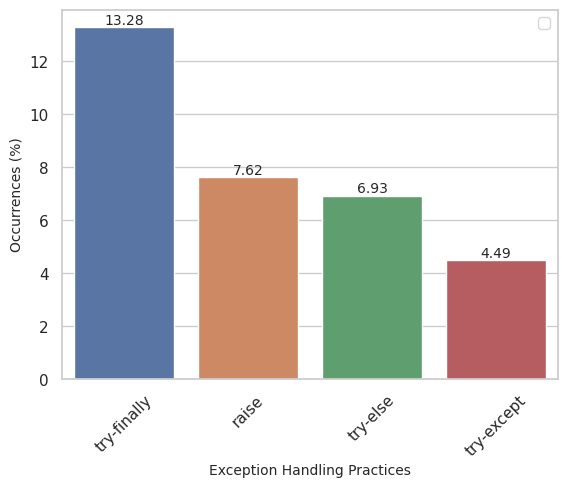

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=df_total, x="Exception Handling", y="Percentage")
plt.ylabel("Occurrences (%)", fontsize= 10)
plt.xlabel("Exception Handling Practices", fontsize= 10)
plt.tick_params(axis='x', rotation=45)
plt.legend(loc="best", ncol=3)
plt.title("", fontsize= 15)

for i in ax.containers:
    ax.bar_label(i, fontsize=10)



In [178]:
df_except_types = df.str_except_identifiers.str.split(" ").explode().value_counts().reset_index()

In [179]:
df_except_types

,index,str_except_identifiers
0,Exception,18674
1,ValueError,7449
2,KeyError,5803
3,AttributeError,4193
4,OSError,3891
...,...,...
4230,ConnectorResourceError,1
4231,ValidationException,1
4232,DuplicateLogicalIdException,1
4233,SearxParameterException,1


In [180]:
#df_except_types = df_except_types[1:]

In [181]:
def get_capitalized_elements(list):
    for element in list:
        if element[0].isupper():
            return element

In [182]:
#TODO: get a list of built-in exceptions and flag them
df_except_types['str_uniq_identifiers'] = df_except_types['index'].apply(lambda x: get_capitalized_elements(x.split(".")))

df_except_types = df_except_types[df_except_types['str_uniq_identifiers'].notna()].head(20)

In [183]:
df_except_types = df_except_types.head(20) 
df_except_types['perc'] =  ((df_except_types['str_except_identifiers']/ df_except_types['str_except_identifiers'].sum()) * 100).round(2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


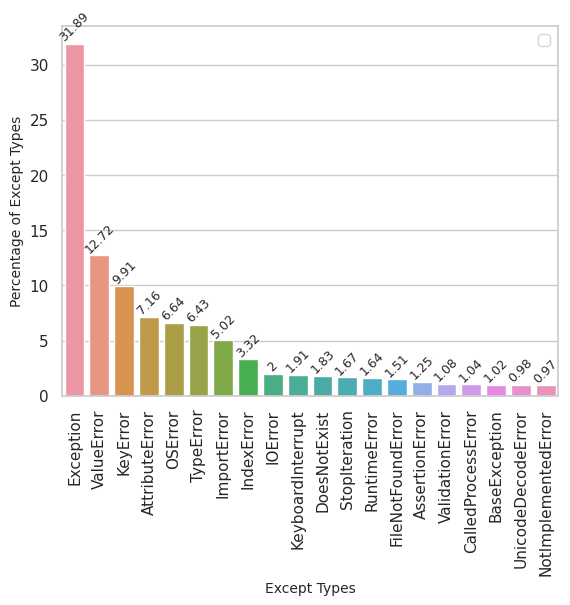

In [184]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=df_except_types, x="str_uniq_identifiers", y="perc")
plt.ylabel("Percentage of Except Types", fontsize= 10)
plt.xlabel("Except Types", fontsize= 10)
plt.tick_params(axis='x', rotation=90)
plt.legend(loc="best", ncol=3)
plt.title("", fontsize= 15)

for i in ax.containers:
    ax.bar_label(i, fontsize=9, rotation=45)


In [210]:
df_except_types

,index,str_except_identifiers,str_uniq_identifiers,perc
0,Exception,18674,Exception,31.89
1,ValueError,7449,ValueError,12.72
2,KeyError,5803,KeyError,9.91
3,AttributeError,4193,AttributeError,7.16
4,OSError,3891,OSError,6.64
5,TypeError,3768,TypeError,6.43
6,ImportError,2941,ImportError,5.02
7,IndexError,1947,IndexError,3.32
8,IOError,1171,IOError,2.00
9,KeyboardInterrupt,1116,KeyboardInterrupt,1.91


In [211]:
df_except_types.to_csv('files_2/except_types.csv')

In [185]:
df_raise_types = df.str_raise_identifiers.str.split(" ").explode().value_counts().reset_index()
df_raise_types = df_raise_types[1:]
df_raise_types.head(20)

,index,str_raise_identifiers
1,NotImplementedError,15733
2,TypeError,8247
3,Exception,7263
4,RuntimeError,7044
5,AssertionError,2031
6,ValidationError,1721
7,SystemExit,1656
8,e,1473
9,AttributeError,1349
10,KeyError,1292


In [186]:
df_raise_types['str_uniq_identifiers'] = df_raise_types['index'].apply(lambda x: get_capitalized_elements(x.split(".")))

df_raise_types = df_raise_types[df_raise_types['str_uniq_identifiers'].notna()].head(20)

In [187]:
df_raise_types = df_raise_types.head(20) 
df_raise_types['perc'] =  ((df_raise_types['str_raise_identifiers']/ df_raise_types['str_raise_identifiers'].sum()) * 100).round(2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


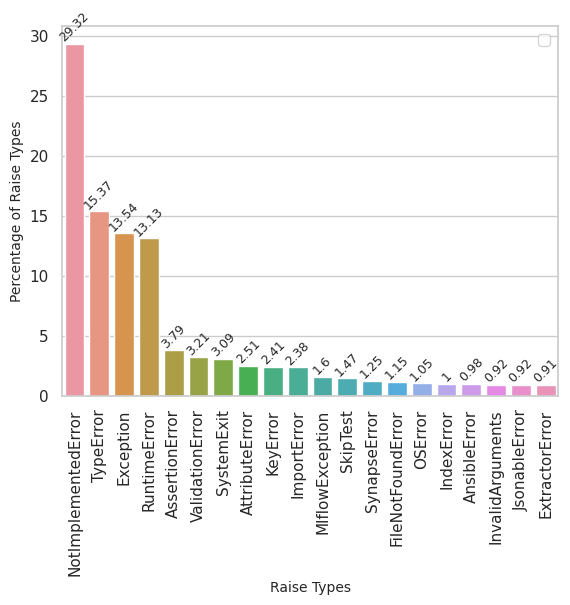

In [188]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=df_raise_types, x="index", y="perc")
plt.ylabel("Percentage of Raise Types", fontsize= 10)
plt.xlabel("Raise Types", fontsize= 10)
plt.tick_params(axis='x', rotation=90)
plt.legend(loc="best", ncol=3)
plt.title("", fontsize= 15)

for i in ax.containers:
    ax.bar_label(i, fontsize=9, rotation=45)

In [208]:
df_raise_types

,index,str_raise_identifiers,str_uniq_identifiers,perc
1,NotImplementedError,15733,NotImplementedError,29.32
2,TypeError,8247,TypeError,15.37
3,Exception,7263,Exception,13.54
4,RuntimeError,7044,RuntimeError,13.13
5,AssertionError,2031,AssertionError,3.79
6,ValidationError,1721,ValidationError,3.21
7,SystemExit,1656,SystemExit,3.09
9,AttributeError,1349,AttributeError,2.51
10,KeyError,1292,KeyError,2.41
11,ImportError,1278,ImportError,2.38


In [209]:
df_raise_types.to_csv('files_2/raises_except.csv')

RQ2. 

In [189]:
df[df.str_uncaught_exceptions.notna()].str_uncaught_exceptions.values

#df.str_uncaught_exceptions.str.split("[.][.][.]").values

array(['...bin.q.get_option_with_default:Exception',
       '...bin.q.detect_qtable_name_source_info:FileNotFoundException ...bin.q.detect_qtable_name_source_info:UnknownFileTypeException',
       '...bin.q.validate_content_signature:ContentSignatureDataDiffersException ...bin.q.validate_content_signature:ContentSignatureDataDiffersException ...bin.q.validate_content_signature:ContentSignatureDiffersException',
       ..., '...py.visdom.do_tsne:Exception',
       '...py.visdom.do_tsne:Exception',
       '...bin.proxy._make_query:ValueError'], dtype=object)

In [190]:
import numpy as np
#Couting uncaught exceptions:
#df[df.str_uncaught_exceptions.notna()].str_uncaught_exceptions.str.split("[.][.][.]").values[3]

df['n_uncaught_exceptions'] = df['str_uncaught_exceptions'].str.split("[.][.][.]").apply(lambda x: len(x)-1 if x is not np.nan else 0)

In [191]:
df.columns

Index(['file', 'function', 'func_body', 'str_uncaught_exceptions',
       'n_try_except', 'n_try_pass', 'n_finally', 'n_generic_except',
       'n_raise', 'n_captures_broad_raise', 'n_captures_try_except_raise',
       'n_captures_misplaced_bare_raise', 'n_try_else', 'n_try_return',
       'str_except_identifiers', 'str_raise_identifiers', 'str_except_block',
       'n_nested_try', 'n_bare_except', 'n_bare_raise_finally', 'project',
       'n_try_except_uni', 'n_raise_uni', 'n_finally_uni', 'n_try_else_uni',
       'n_uncaught_exceptions'],
      dtype='object')

In [192]:
cols = ['n_captures_misplaced_bare_raise', 'n_generic_except', 'n_captures_broad_raise', 'n_try_pass', 'n_try_return', 'n_nested_try', 'n_uncaught_exceptions', 'n_try_except', 
        'n_raise', 'n_bare_raise_finally', 'n_bare_except']

for col in cols:
    df[col+'_uni'] = df[col].apply(lambda x: 1 if x >= 1 else x)

In [193]:
df.columns

Index(['file', 'function', 'func_body', 'str_uncaught_exceptions',
       'n_try_except', 'n_try_pass', 'n_finally', 'n_generic_except',
       'n_raise', 'n_captures_broad_raise', 'n_captures_try_except_raise',
       'n_captures_misplaced_bare_raise', 'n_try_else', 'n_try_return',
       'str_except_identifiers', 'str_raise_identifiers', 'str_except_block',
       'n_nested_try', 'n_bare_except', 'n_bare_raise_finally', 'project',
       'n_try_except_uni', 'n_raise_uni', 'n_finally_uni', 'n_try_else_uni',
       'n_uncaught_exceptions', 'n_captures_misplaced_bare_raise_uni',
       'n_generic_except_uni', 'n_captures_broad_raise_uni', 'n_try_pass_uni',
       'n_try_return_uni', 'n_nested_try_uni', 'n_uncaught_exceptions_uni',
       'n_bare_raise_finally_uni', 'n_bare_except_uni'],
      dtype='object')

In [194]:
df_rq2 = df.agg({'function': ['count'], 'n_captures_misplaced_bare_raise_uni': ['sum'], 'n_generic_except_uni': ['sum'], 'n_captures_broad_raise_uni': ['sum'], 'n_try_pass_uni': ['sum'], 
                 'n_try_return_uni': ['sum'], 'n_nested_try_uni': ['sum'], 'n_uncaught_exceptions_uni': ['sum'], 'n_try_except_uni' : ['sum'], 'n_raise_uni' : ['sum'],
                 'n_bare_raise_finally_uni' : ['sum'], 'n_bare_except_uni' : ['sum'], 'n_finally_uni' : ['sum']})
df_rq2 = df_rq2.max().to_frame().T

In [195]:
df_rq2

,function,n_captures_misplaced_bare_raise_uni,n_generic_except_uni,n_captures_broad_raise_uni,n_try_pass_uni,n_try_return_uni,n_nested_try_uni,n_uncaught_exceptions_uni,n_try_except_uni,n_raise_uni,n_bare_raise_finally_uni,n_bare_except_uni,n_finally_uni
0,1295519.0,124.0,15504.0,5744.0,10219.0,11849.0,745.0,7771.0,58186.0,98771.0,10.0,4189.0,7725.0


In [196]:
#Trys
df_rq2['perc_n_try_pass_uni'] = (df_rq2['n_try_pass_uni']/ df_rq2['n_try_except_uni']) * 100
df_rq2['perc_n_generic_except_uni'] = (df_rq2['n_generic_except_uni']/ df_rq2['n_try_except_uni']) * 100
df_rq2['perc_uncaught_exceptions_uni'] = (df_rq2['n_uncaught_exceptions_uni']/ df_rq2['n_try_except_uni']) * 100
#df_rq2['perc_n_try_return_uni'] = (df_rq2['n_try_return_uni']/ df_rq2['n_try_except_uni']) * 100
df_rq2['perc_n_nested_try_uni'] = (df_rq2['n_nested_try_uni']/ df_rq2['n_try_except_uni']) * 100
df_rq2['perc_n_bare_except'] = (df_rq2['n_bare_except_uni']/ df_rq2['n_try_except_uni']) * 100

#Raise
df_rq2['perc_n_captures_misplaced_bare_raise_uni'] = (df_rq2['n_captures_misplaced_bare_raise_uni']/ df_rq2['n_raise_uni']) * 100
df_rq2['perc_n_captures_broad_raise_uni'] = (df_rq2['n_captures_broad_raise_uni']/ df_rq2['n_raise_uni']) * 100

#Finally
df_rq2['perc_n_bare_raise_finally'] = (df_rq2['n_bare_raise_finally_uni']/ df_rq2['n_finally_uni']) * 100

df_rq2

,function,n_captures_misplaced_bare_raise_uni,n_generic_except_uni,n_captures_broad_raise_uni,n_try_pass_uni,n_try_return_uni,n_nested_try_uni,n_uncaught_exceptions_uni,n_try_except_uni,n_raise_uni,...,n_bare_except_uni,n_finally_uni,perc_n_try_pass_uni,perc_n_generic_except_uni,perc_uncaught_exceptions_uni,perc_n_nested_try_uni,perc_n_bare_except,perc_n_captures_misplaced_bare_raise_uni,perc_n_captures_broad_raise_uni,perc_n_bare_raise_finally
0,1295519.0,124.0,15504.0,5744.0,10219.0,11849.0,745.0,7771.0,58186.0,98771.0,...,4189.0,7725.0,17.562644,26.645585,13.355446,1.280377,7.199326,0.125543,5.815472,0.12945


In [197]:
df_total_rq2 = df_rq2.loc[:, ["perc_n_nested_try_uni", "perc_n_try_pass_uni", "perc_n_generic_except_uni", "perc_uncaught_exceptions_uni", 
                              "perc_n_captures_misplaced_bare_raise_uni", "perc_n_captures_broad_raise_uni", "perc_n_bare_except", "perc_n_bare_raise_finally"]] #"perc_n_try_return_uni",
df_total_rq2

,perc_n_nested_try_uni,perc_n_try_pass_uni,perc_n_generic_except_uni,perc_uncaught_exceptions_uni,perc_n_captures_misplaced_bare_raise_uni,perc_n_captures_broad_raise_uni,perc_n_bare_except,perc_n_bare_raise_finally
0,1.280377,17.562644,26.645585,13.355446,0.125543,5.815472,7.199326,0.12945


In [198]:
df_total_rq2.columns = ['Nested Try', 'Swallowing Exceptions', 'Too Broad Except', 'Unhandled Exceptions', 'Bare Raise Block', 'Too Broad Raising', 'Bare Except', 'Baire Raise Finally'] #'Try and Return'
df_total_rq2

,Nested Try,Swallowing Exceptions,Too Broad Except,Unhandled Exceptions,Bare Raise Block,Too Broad Raising,Bare Except,Baire Raise Finally
0,1.280377,17.562644,26.645585,13.355446,0.125543,5.815472,7.199326,0.12945


In [199]:
df_total_rq2 = df_total_rq2.T[0:].reset_index()
df_total_rq2

,index,0
0,Nested Try,1.280377
1,Swallowing Exceptions,17.562644
2,Too Broad Except,26.645585
3,Unhandled Exceptions,13.355446
4,Bare Raise Block,0.125543
5,Too Broad Raising,5.815472
6,Bare Except,7.199326
7,Baire Raise Finally,0.129450


In [200]:
#Rename columns:
df_total_rq2.columns = ['Exception Handling', 'Percentage']
df_total_rq2['Percentage'] = df_total_rq2['Percentage'].round(2)

#order by percentage:
df_total_rq2 = df_total_rq2.sort_values(by=['Percentage'], ascending=False)
df_total_rq2

,Exception Handling,Percentage
2,Too Broad Except,26.65
1,Swallowing Exceptions,17.56
3,Unhandled Exceptions,13.36
6,Bare Except,7.20
5,Too Broad Raising,5.82
0,Nested Try,1.28
4,Bare Raise Block,0.13
7,Baire Raise Finally,0.13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


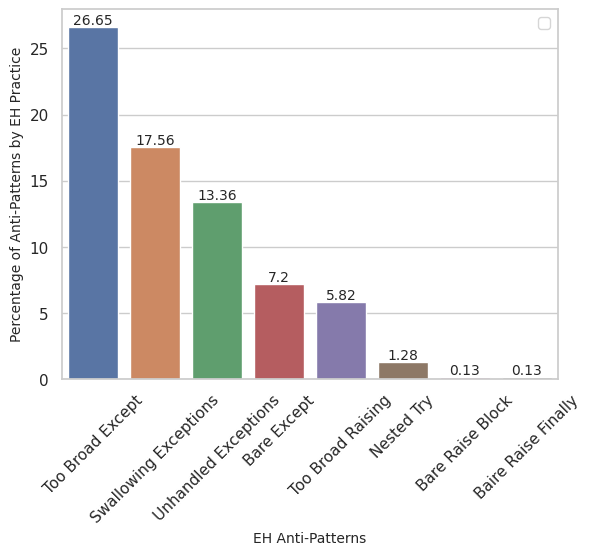

In [201]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=df_total_rq2, x="Exception Handling", y="Percentage")
plt.ylabel("Percentage of Anti-Patterns by EH Practice", fontsize= 10)
plt.xlabel("EH Anti-Patterns", fontsize= 10)
plt.tick_params(axis='x', rotation=45)
plt.legend(loc="best", ncol=3)
plt.title("", fontsize= 15)

for i in ax.containers:
    ax.bar_label(i, fontsize=10)

RQs New

In [202]:
df_rq21 = df.groupby('project').agg({'function': ['count'], 'n_captures_misplaced_bare_raise_uni': ['sum'], 'n_generic_except_uni': ['sum'], 'n_captures_broad_raise_uni': ['sum'], 'n_try_pass_uni': ['sum'], 
                                    'n_try_return_uni': ['sum'], 'n_nested_try_uni': ['sum'], 'n_uncaught_exceptions_uni': ['sum'],
                                    'n_try_except_uni' : ['sum'], 'n_raise_uni' : ['sum']}).reset_index()
#df_rq2 = df.agg({'function': ['count'], 'n_try_except_uni': ['sum'], 'n_try_pass_uni': ['sum'], 'n_generic_except_uni': ['sum'], 'n_raise_uni': ['sum'], 'n_captures_try_except_raise_uni': ['sum'], 'n_captures_broad_raise_uni': ['sum'], 'n_uncaught_exceptions': ['sum']})
#df_rq2 = df_rq2.max().to_frame().T

In [203]:
#Trys
df_rq21['perc_n_try_pass_uni'] = (df_rq21['n_try_pass_uni']/ df_rq21['n_try_except_uni']) * 100
df_rq21['perc_n_generic_except_uni'] = (df_rq21['n_generic_except_uni']/ df_rq21['n_try_except_uni']) * 100
df_rq21['perc_uncaught_exceptions_uni'] = (df_rq21['n_uncaught_exceptions_uni']/ df_rq21['n_try_except_uni']) * 100
df_rq21['perc_n_try_return_uni'] = (df_rq21['n_try_return_uni']/ df_rq21['n_try_except_uni']) * 100
df_rq21['perc_n_nested_try_uni'] = (df_rq21['n_nested_try_uni']/ df_rq21['n_try_except_uni']) * 100

#Raise
df_rq21['perc_n_captures_misplaced_bare_raise_uni'] = (df_rq21['n_captures_misplaced_bare_raise_uni']/ df_rq21['n_raise_uni']) * 100
df_rq21['perc_n_captures_broad_raise_uni'] = (df_rq21['n_captures_broad_raise_uni']/ df_rq21['n_raise_uni']) * 100

df_rq21

,project,function,n_captures_misplaced_bare_raise_uni,n_generic_except_uni,n_captures_broad_raise_uni,n_try_pass_uni,n_try_return_uni,n_nested_try_uni,n_uncaught_exceptions_uni,n_try_except_uni,n_raise_uni,perc_n_try_pass_uni,perc_n_generic_except_uni,perc_uncaught_exceptions_uni,perc_n_try_return_uni,perc_n_nested_try_uni,perc_n_captures_misplaced_bare_raise_uni,perc_n_captures_broad_raise_uni
,,count,sum,sum,sum,sum,sum,sum,sum,sum,sum,,,,,,,
0,12306,175,0,10,1,3,1,0,0,21,10,14.285714,47.619048,0.000000,4.761905,0.000000,0.0,10.000000
1,30-days-of-python,22,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abu,2274,0,28,0,18,25,2,52,123,222,14.634146,22.764228,42.276423,20.325203,1.626016,0.0,0.000000
3,activitywatch,723,0,8,17,10,7,1,12,42,69,23.809524,19.047619,28.571429,16.666667,2.380952,0.0,24.637681
4,ailearning,924,0,0,0,0,0,0,0,8,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,yyetsbot,343,0,5,0,1,0,0,0,7,0,14.285714,71.428571,0.000000,0.000000,0.000000,NaN,NaN
491,zappa,418,0,29,2,16,11,3,0,67,47,23.880597,43.283582,0.000000,16.417910,4.477612,0.0,4.255319
492,zhao,19,0,0,0,0,0,0,3,0,1,NaN,NaN,inf,NaN,NaN,0.0,0.000000


In [204]:
df_total_rq21 = df_rq21.loc[:, ["project", "function", "perc_n_nested_try_uni", "perc_n_try_pass_uni", "perc_n_generic_except_uni", "perc_uncaught_exceptions_uni", "perc_n_try_return_uni", "perc_n_captures_misplaced_bare_raise_uni", "perc_n_captures_broad_raise_uni"]]
df_total_rq21

,project,function,perc_n_nested_try_uni,perc_n_try_pass_uni,perc_n_generic_except_uni,perc_uncaught_exceptions_uni,perc_n_try_return_uni,perc_n_captures_misplaced_bare_raise_uni,perc_n_captures_broad_raise_uni
,,count,,,,,,,
0,12306,175,0.000000,14.285714,47.619048,0.000000,4.761905,0.0,10.000000
1,30-days-of-python,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abu,2274,1.626016,14.634146,22.764228,42.276423,20.325203,0.0,0.000000
3,activitywatch,723,2.380952,23.809524,19.047619,28.571429,16.666667,0.0,24.637681
4,ailearning,924,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
490,yyetsbot,343,0.000000,14.285714,71.428571,0.000000,0.000000,NaN,NaN
491,zappa,418,4.477612,23.880597,43.283582,0.000000,16.417910,0.0,4.255319
492,zhao,19,NaN,NaN,NaN,inf,NaN,0.0,0.000000


In [205]:
#rename columns:
#df_total_rq21.columns = ['Exception Handling', 'Percentage']
#df_total_rq21['Percentage'] = df_total_rq21['Percentage'].round(2)

#order by percentage:
#df_total_rq21 = df_total_rq21.sort_values(by=['Percentage'], ascending=False)
#df_total_rq21

In [206]:
df_total_rq21

,project,function,perc_n_nested_try_uni,perc_n_try_pass_uni,perc_n_generic_except_uni,perc_uncaught_exceptions_uni,perc_n_try_return_uni,perc_n_captures_misplaced_bare_raise_uni,perc_n_captures_broad_raise_uni
,,count,,,,,,,
0,12306,175,0.000000,14.285714,47.619048,0.000000,4.761905,0.0,10.000000
1,30-days-of-python,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abu,2274,1.626016,14.634146,22.764228,42.276423,20.325203,0.0,0.000000
3,activitywatch,723,2.380952,23.809524,19.047619,28.571429,16.666667,0.0,24.637681
4,ailearning,924,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
490,yyetsbot,343,0.000000,14.285714,71.428571,0.000000,0.000000,NaN,NaN
491,zappa,418,4.477612,23.880597,43.283582,0.000000,16.417910,0.0,4.255319
492,zhao,19,NaN,NaN,NaN,inf,NaN,0.0,0.000000


In [207]:
import seaborn as sns

sns.set_theme(style="whitegrid")

fig = sns.violinplot(x='rule', y='commit', orient= 'v', cut=0, scale='width', data=df_com_adj).get_figure()
plt.ylabel("Number of Commits", fontsize= 10)
plt.xlabel("Exception Handling Smell", fontsize= 10)
plt.tick_params(axis='x', rotation=90)
plt.legend(loc="best", ncol=3)
plt.title("", fontsize= 15)

for i in ax.containers:
    ax.bar_label(i, fontsize=10)

NameError: name 'df_com_adj' is not defined